# (1) Results from positions

In [31]:
import json
import pandas as pd
import numpy as np
import os
from bson import json_util
from datetime import datetime
import asyncio
import nest_asyncio
import ipaddress
import pymongo
from datetime import datetime, timedelta
from statistics import mean, stdev

folders_positions = os.listdir("Positions")
folders_positions = [f for f in folders_positions if f != '.ipynb_checkpoints']
#files_positions = [files_tickdata[1]]
print(folders_positions)

['TickBars', 'VolumeImbalanceBars', 'VolumeBars']


In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

folders_positions = os.listdir("Positions")
folders_positions = [f for f in folders_positions if f != '.ipynb_checkpoints']
#files_positions = [files_tickdata[1]]
print(folders_positions)

for folder in folders_positions:
    
    positions_df = []
    results = []

    files_positions = os.listdir(f"Positions/{folder}")
    files_positions = [f for f in files_positions if f != '.ipynb_checkpoints']

    print("########################################################################################")
    print("########################################################################################")
    print(f"###################################### {folder} #######################################")
    
    for file in files_positions:

        # ----------------------------------------------- #
        #  (1)             load data                      #
        # ----------------------------------------------- #

        # get the Y variables (labels)
        ## 1. Remove extension
        stem = Path(file).stem   # e.g "Signal_SMA_EMA"
        ## 2. Split by underscore
        parts = stem.split("_")  # ['Signal', 'SMA', 'EMA']
        ## 3. First part is the prefix ("Signal"), rest are suffixes
        prefix, suffixes = parts[0], parts[1:]
        ## 4. Rebuild into the desired list
        Y_variables = [f"{prefix} {s}" for s in suffixes]
        #print(Y_variables)

        # Load the match trades tick data
        with open(f"Positions/{folder}/{file}") as f:
            positions = pd.read_json(f)

        # ----------------------------------------------- #
        #  (1) End                                        #
        # ----------------------------------------------- #
        
        try: 
            #positions_item = {"file name":file,"data":positions}
            #positions_df.append(positions_item)
    
            # ----------------------------------------------- # 
            #  (2)              prepare data                  #
    
            # Convert 'entry' column (dicts) into a DataFrame
            entry_df = pd.json_normalize(positions["entry"]) 
     
            # get the X_data variables for the fitting the model
            X_variables = [col for col in entry_df.columns if col not in Y_variables]
            values_to_remove = ["price", 'timestamp.$date']
            X_variables = [x for x in X_variables if x not in values_to_remove]
            #print(X_variables)
                    
            #  (2) End                                        # 
            # ----------------------------------------------- # 

            #positions = positions[positions["change"] >= 0.002]
            
            print("\n")
            print("######################################################")
            print("######################################################")
            print(f"######################### {stem}")
            print("\n")
    
            print("Summary for the change")
            print("mean")
            print(positions["change"].mean())
            print("standard deviation")
            print(np.std(positions["change"]))
            print("\n")
            
        except:
            pass

['TickBars', 'VolumeImbalanceBars', 'VolumeBars']
########################################################################################
########################################################################################
###################################### TickBars #######################################


######################################################
######################################################
######################### Signal_SMA


Summary for the change
mean
9.625045915957094e-05
standard deviation
0.0010422411245627605




######################################################
######################################################
######################### Signal_EMA


Summary for the change
mean
0.0002868512071126806
standard deviation
0.0012051974625902013




######################################################
######################################################
######################### Signal_RSI


Summary for the change
mean
-0.00023540912350

# (2) Model Training and Fitting

In [17]:
import json
import pandas as pd
import numpy as np
import os
from bson import json_util
from datetime import datetime
import asyncio
import nest_asyncio
import ipaddress
import pymongo
from datetime import datetime, timedelta
from statistics import mean, stdev

folders_positions = os.listdir("Positions")
folders_positions = [f for f in folders_positions if f != '.ipynb_checkpoints']
#files_positions = [files_tickdata[1]]
print(folders_positions)

['TickBars', 'VolumeImbalanceBars', 'VolumeBars']


['TickBars', 'VolumeImbalanceBars', 'VolumeBars']
########################################################################################
########################################################################################
###################################### TickBars #######################################


######################################################
######################################################
Signal_SMA


Summary for the change
mean
0.00022360843411662964
standard deviation
0.0003341783159925218




######################################################
######################################################
Signal_EMA


Summary for the change
mean
0.0003879662580483071
standard deviation
0.00035660897950569293


Best tree index: 0
Best tree test accuracy: 0.00
Confusion Matrix:
 [[0 0]
 [1 0]]


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


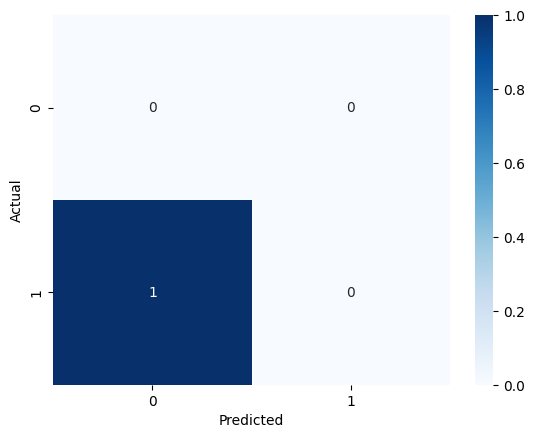

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Feature Importances:
 EMA 9     0.0
EMA 21    0.0
ATR       0.0
dtype: float64


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

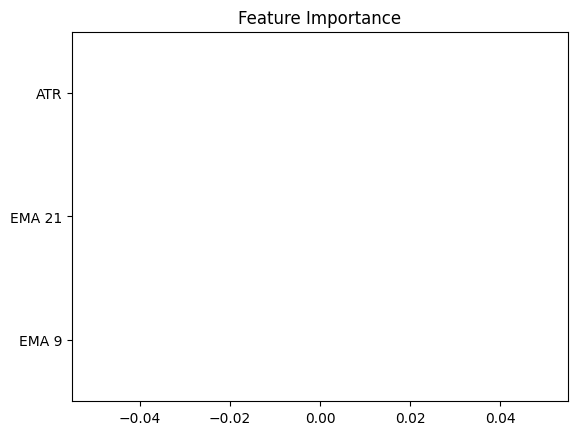



######################################################
######################################################
Signal_SMA_EMA


Summary for the change
mean
-7.759597741031187e-05
standard deviation
0.0


########################################################################################
########################################################################################
###################################### VolumeImbalanceBars #######################################


######################################################
######################################################
Signal_SMA


Summary for the change
mean
0.00019955170373725002
standard deviation
0.00040517692666798165


Best tree index: 0
Best tree test accuracy: 0.50
Confusion Matrix:
 [[1 0]
 [1 0]]


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


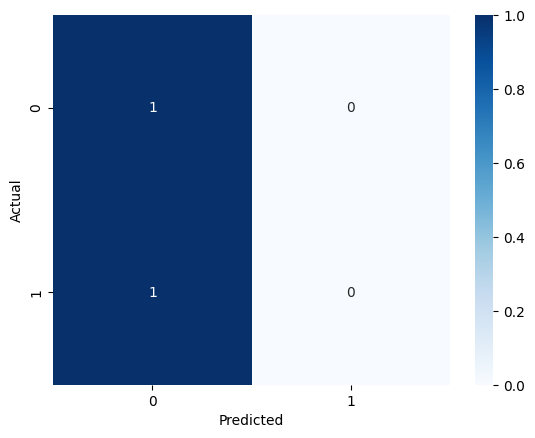

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Feature Importances:
 SMA 9     0.0
SMA 21    0.0
ATR       0.0
dtype: float64


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

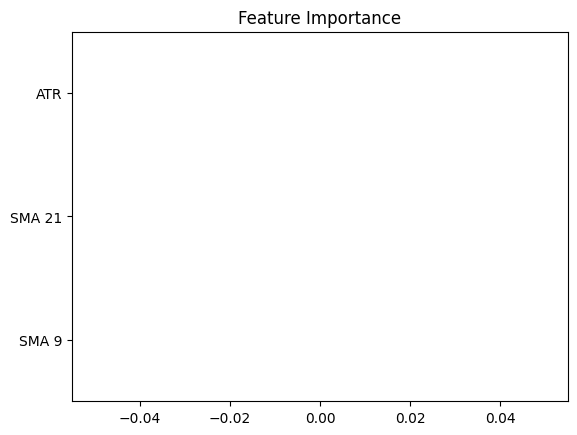

Log Loss: 18.021826694558577
ROC-AUC is only meaningful for binary or multi-class with probabilities.


######################################################
######################################################
Signal_EMA


Summary for the change
mean
0.0002698254847256667
standard deviation
0.0003122883091217788




######################################################
######################################################
Signal_RSI


Summary for the change
mean
0.00014613175994898777
standard deviation
0.00018168140533901224


########################################################################################
########################################################################################
###################################### VolumeBars #######################################


######################################################
######################################################
Signal_SMA


Summary for the change
mean
0.00021375526794375002
standard deviati

/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


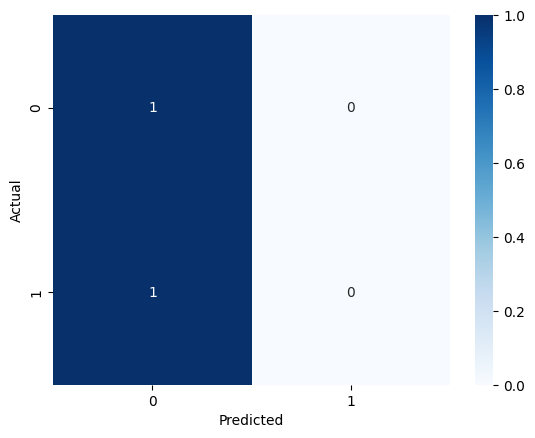

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Feature Importances:
 SMA 9     0.0
SMA 21    0.0
ATR       0.0
dtype: float64


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

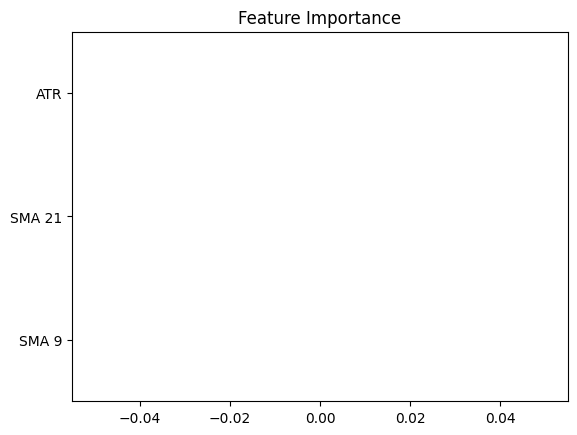

Log Loss: 18.021826694558577
ROC-AUC is only meaningful for binary or multi-class with probabilities.


######################################################
######################################################
Signal_EMA


Summary for the change
mean
0.0002566806344984458
standard deviation
0.0001501006578522858


Best tree index: 0
Best tree test accuracy: 0.00
Confusion Matrix:
 [[0 0]
 [1 0]]


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


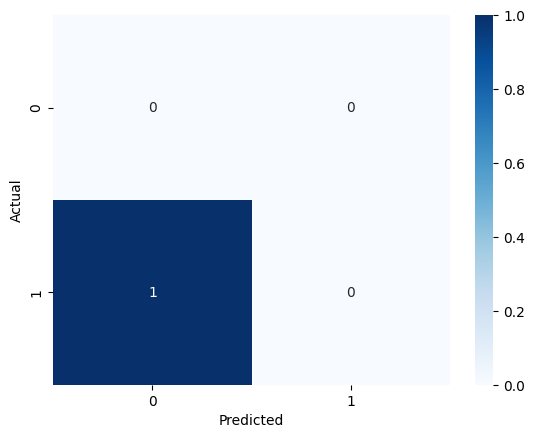

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Feature Importances:
 EMA 9     0.0
EMA 21    0.0
ATR       0.0
dtype: float64


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

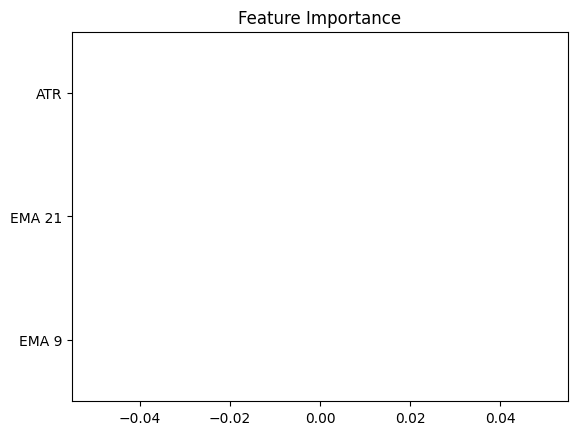



######################################################
######################################################
Signal_RSI


Summary for the change
mean
1.2353529282000838e-05
standard deviation
0.00014575203452067435


Best tree index: 1
Best tree test accuracy: 0.80
Confusion Matrix:
 [[4 0]
 [1 0]]


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


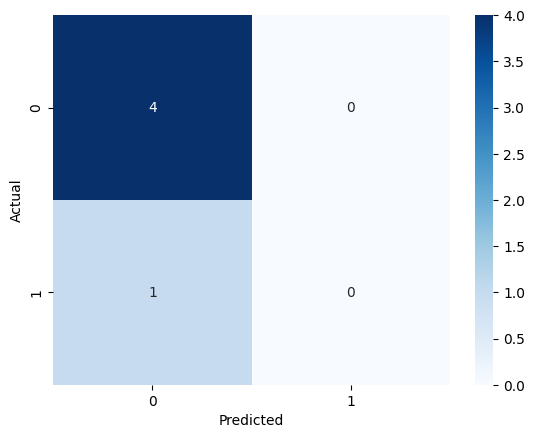

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Feature Importances:
 RSI    1.0
ATR    0.0
dtype: float64


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

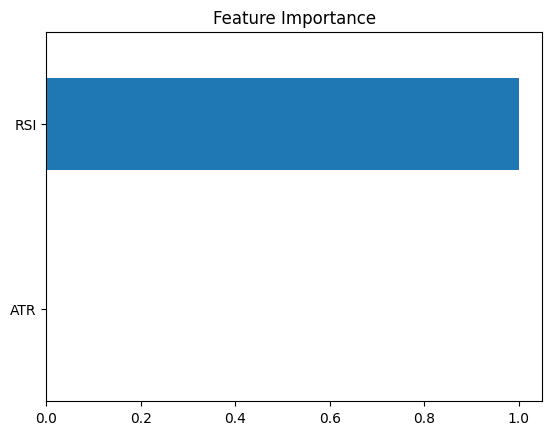

Log Loss: 7.20873067782343
ROC-AUC is only meaningful for binary or multi-class with probabilities.
5-Fold Cross-Validation Accuracy Scores: [0.25       1.         0.66666667 0.66666667 1.        ]
Mean CV Accuracy: 0.7166666666666666


/home/erickchatalov/anaconda3/envs/rapids-25.02/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

folders_positions = os.listdir("Positions")
folders_positions = [f for f in folders_positions if f != '.ipynb_checkpoints']
#files_positions = [files_tickdata[1]]
print(folders_positions)

for folder in folders_positions:
    
    positions_df = []
    results = []

    files_positions = os.listdir(f"Positions/{folder}")
    files_positions = [f for f in files_positions if f != '.ipynb_checkpoints']

    print("########################################################################################")
    print("########################################################################################")
    print(f"###################################### {folder} #######################################")
    
    for file in files_positions:

        # ----------------------------------------------- #
        #  (1)             load data                      #
        # ----------------------------------------------- #

        # get the Y variables (labels)
        ## 1. Remove extension
        stem = Path(file).stem   # e.g "Signal_SMA_EMA"
        ## 2. Split by underscore
        parts = stem.split("_")  # ['Signal', 'SMA', 'EMA']
        ## 3. First part is the prefix ("Signal"), rest are suffixes
        prefix, suffixes = parts[0], parts[1:]
        ## 4. Rebuild into the desired list
        Y_variables = [f"{prefix} {s}" for s in suffixes]
        #print(Y_variables)

        # Load the match trades tick data
        with open(f"Positions/{folder}/{file}") as f:
            positions = pd.read_json(f)

        try: 
            #positions_item = {"file name":file,"data":positions}
            #positions_df.append(positions_item)
        
            # ----------------------------------------------- #
            #  (1) End                                        #
            # ----------------------------------------------- #
    
            # ----------------------------------------------- # 
            #  (2)              prepare data                  #
    
            # Convert 'entry' column (dicts) into a DataFrame
            entry_df = pd.json_normalize(positions["entry"]) 
     
            # get the X_data variables for the fitting the model
            X_variables = [col for col in entry_df.columns if col not in Y_variables]
            values_to_remove = ["price", 'timestamp.$date']
            X_variables = [x for x in X_variables if x not in values_to_remove]
            #print(X_variables)
                    
            #  (2) End                                        # 
            # ----------------------------------------------- # 
    
            #  (3) Training the model #
            # ----------------------- #
    
            # training data #
            X_data = entry_df[X_variables]
            Y = (positions["change"] > 0).astype(int)
            
            predictors_list = positions
            # Example dataset
            X, Y = X_data, Y
        
            print("\n")
            print("######################################################")
            print("######################################################")
            print(stem)
            print("\n")
    
            print("Summary for the change")
            print("mean")
            print(positions["change"].mean())
            print("standard deviation")
            print(np.std(positions["change"]))
            print("\n")
        
            try:
                # Train-test split
                X_train, X_test, Y_train, Y_test = train_test_split(
                    X, Y, test_size=0.3, random_state=42, stratify=Y
                )
        
                # Train Random Forest
                rf = RandomForestClassifier(n_estimators=1000,max_depth=None, random_state=42)
                rf.fit(X_train, Y_train)
        
                # Evaluate each tree
                best_score = -1
                best_tree = None
                best_idx = -1
                
                for i, tree in enumerate(rf.estimators_):
                    Y_pred_tree = tree.predict(X_test.to_numpy()) 
                    score = accuracy_score(Y_test, Y_pred_tree)
                    if score > best_score:
                        best_score = score
                        best_tree = tree
                        best_idx = i
                
                print(f"Best tree index: {best_idx}")
                print(f"Best tree test accuracy: {best_score:.2f}")
    
                save = True
            
            except:
                
                save = False
            
            #  (3) End                #
            # ----------------------- #
    
            #  (4) Save the fitted decision tree #
            # ---------------------------------- #
    
            if save == True:
                results.append({"Signal variable":stem,"Decision Tree":best_tree,"Tree score":best_score})
            
                #  (4) End                           #
                # ---------------------------------- #
                
                # ----------------------------------------- #
                #  (5) create visualizations from the trees #
        
                # Predict with the best tree
                Y_pred_best = best_tree.predict(X_test)
                Y_prob_best = best_tree.predict_proba(X_test)
                
                # Confusion Matrix
                cm = confusion_matrix(Y_test, Y_pred_best)
                print("Confusion Matrix:\n", cm)
                
                # Visualize Confusion Matrix
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                plt.xlabel("Predicted")
                plt.ylabel("Actual")
                plt.show()
                
                # Classification Report (Precision, Recall, F1-score)
                print("Classification Report:\n", classification_report(Y_test, Y_pred_best))
                
                # Feature Importance
                feature_importance = pd.Series(best_tree.feature_importances_, index=X_variables)
                print("Feature Importances:\n", feature_importance)
                feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
                plt.show()
                
                # Log Loss
                loss = log_loss(Y_test, Y_prob_best)
                print("Log Loss:", loss)
                
                # ROC-AUC (only for binary or multi-class with probabilities)
                try:
                    auc = roc_auc_score(Y_test, Y_prob_best, multi_class="ovr")
                    print("ROC-AUC Score:", auc)
                except ValueError:
                    print("ROC-AUC is only meaningful for binary or multi-class with probabilities.")
                
                # Optional: Cross-Validation Score
                cv_scores = cross_val_score(best_tree, X, Y, cv=5)
                print("5-Fold Cross-Validation Accuracy Scores:", cv_scores)
                print("Mean CV Accuracy:", cv_scores.mean())
            
                #  (5) End                                  #
                # ----------------------------------------- #
        except:
            pass